In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
garment = pd.read_csv('garments_worker_productivity.csv').dropna()
garment[:5]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.8,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.8,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125


correlation plot/box plot etc.

a.    Distribution of productivity over different days of the week.

b.    Which department seems to be the most productive

c.    Does the team size increase or decrease productivity

d.    Is incentive the primary motivator towards productivity of workers?
targeted vs actual productivity - can make a metric = productivity_loss
actual productivity vs smv (is prod. lower/higher for longer tasks)
wip vs idle time (WIP should ideally be inverse of idle time)
idle time vs productivity_loss
incentive by department and does incentive drive over time ?

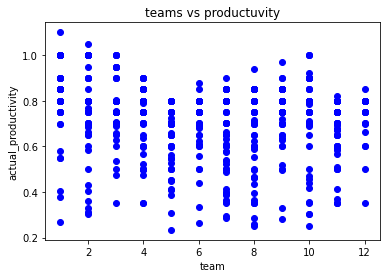

In [3]:
plot(garment['team'], garment['actual_productivity'], marker='o', color='blue', linestyle='None')
xlabel('team')
ylabel('actual_productivity')
title('teams vs productuvity')
show()

In [4]:
g4 = garment[garment['no_of_workers'] == 59]
g6 = garment[garment['no_of_workers'] == 56]
g8 = garment[garment['no_of_workers'] == 30]

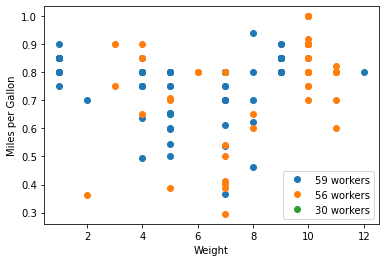

In [5]:
plot(g4['team'], g4['actual_productivity'], marker='o', linestyle='None', label='59 workers')
plot(g6['team'], g6['actual_productivity'], marker='o', linestyle='None', label='56 workers')
plot(g8['team'], g8['actual_productivity'], marker='o', linestyle='None', label='30 workers')
xlabel('Weight')
ylabel('Miles per Gallon')
legend(numpoints=1, loc='best')
show()

In [6]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [7]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices

In [8]:
guerry = garment[['team', 'no_of_workers', 'actual_productivity']]
guerry

,team,no_of_workers,actual_productivity
0,8,59.0,0.940725
2,11,30.5,0.800570
3,12,30.5,0.800570
4,6,56.0,0.800382
5,7,56.0,0.800125
...,...,...,...
1187,4,59.0,0.750051
1188,5,58.0,0.700557
1189,8,57.0,0.700505
1190,6,38.0,0.700246


In [9]:
y, X = dmatrices('actual_productivity ~ team + no_of_workers', data=guerry, return_type='dataframe')
y[:3]

,actual_productivity
0,0.940725
2,0.800570
3,0.800570


In [10]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.018
Model:                             OLS   Adj. R-squared:                  0.015
Method:                  Least Squares   F-statistic:                     6.224
Date:                 Fri, 06 Aug 2021   Prob (F-statistic):            0.00210
Time:                         09:58:48   Log-Likelihood:                 315.42
No. Observations:                  691   AIC:                            -624.8
Df Residuals:                      688   BIC:                            -611.2
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8066      0.041 

In [11]:
result.params

Intercept        0.806579
team            -0.006418
no_of_workers   -0.000814
dtype: float64

In [12]:
result.pvalues

Intercept        8.900253e-68
team             4.482516e-04
no_of_workers    2.233122e-01
dtype: float64

print result

Text(0.5, 0, 'actual_productivity')

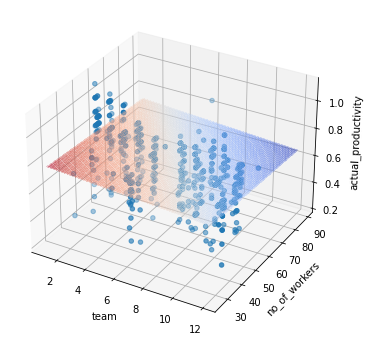

In [13]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(guerry['team'].min(), guerry['team'].max(), 100)
y = np.linspace(guerry['no_of_workers'].min(), guerry['no_of_workers'].max(), 100)
X, Y = np.meshgrid(x, y)
Z_expected = result.params['Intercept'] + result.params['team'] * X + result.params['no_of_workers'] * Y


fig = plt.figure(figsize(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(guerry['team'], guerry['no_of_workers'], guerry['actual_productivity'])
ax.plot_surface(X, Y, Z_expected, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False, alpha=0.2)
ax.set_xlabel('team')
ax.set_ylabel('no_of_workers')
ax.set_zlabel('actual_productivity')